In [3]:
from standardInclude import *

In [4]:
#f = r.TFile("./60hUnblindingWorkshop/gm2offline_ana_newAnalysis.root")
f = r.TFile("./60hUnblindingWorkshop/data/crowded/gm2offline_ana_17366149_15930.00084.root")
t = f.Get("farline").Get("evwTree")
f.ls()

TFile**		./60hUnblindingWorkshop/data/crowded/gm2offline_ana_17366149_15930.00084.root	
 TFile*		./60hUnblindingWorkshop/data/crowded/gm2offline_ana_17366149_15930.00084.root	
  TDirectoryFile*		farline	farline (ReconComparisonEvWClusterSum) folder
   OBJ: TTree	evwTree	evwTree : 0 at: 0x7ffffb234b60
   KEY: TTree	evwTree;126	evwTree
   KEY: TTree	evwTree;125	evwTree
   KEY: TH2D	evwEnergyEvW;1	EnergyEast vs. EnergyWest
   KEY: TH2D	counterHist;1	Number of Clusters Per Island in East and West
   KEY: TH2D	counterHistHighEnergy;1	Number of Clusters Per Island in East and West [All Clusters Above Energy Cutoff]
   KEY: TH2D	evwDeltaXDeltaY;1	Energy Weighted #deltaX vs. #deltaY
   KEY: TH2D	evwDeltaTCalo;1	Energy Weighted #deltaT
   KEY: TH1D	evwDeltaE;1	#deltaE (n:n Islands Only)
   KEY: TH1D	evwDeltaEAll;1	#deltaE (All Islands)
  KEY: TDirectoryFile	farline;1	farline (ReconComparisonEvWClusterSum) folder


In [5]:
t.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries : 15287588 : Total =      8714819705 bytes  File  Size = 3630521264 *
*        :          : Tree compression factor =   2.40                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries : 15287588 : Total  Size=   61164197 bytes  File Size  =     312847 *
*Baskets :      141 : Basket Size=    1478656 bytes  Compression= 195.50     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries : 15287588 : Total  Size=   61164632 bytes  File Size  =     313087 *
*Baskets :      141 : Basket Size=    1478656 bytes  Compression= 195.35     *
*...................................................

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


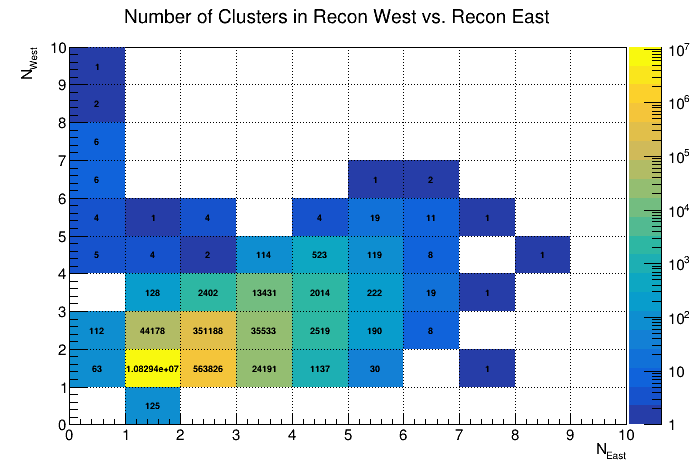

In [35]:
c = r.TCanvas()
h = r.TH2D("h","Number of Clusters in Recon West vs. Recon East; N_{East}; N_{West}",10,0,10,10,0,10)
t.Draw("numberOfClustersWest:numberOfClustersEast>>h"
       ,"(energyWestMaxEnergy>450 || energyEastMaxEnergy > 450) && energyWestMaxEnergy < 30000"
       ,"goff")
#h.Scale(1/h.GetBinContent(2,2)*100)
#h.GetZaxis().SetRangeUser(0.00001,100)
h.Draw("colz text")
c.SetLogz()
c.SetGrid()
c.Draw()

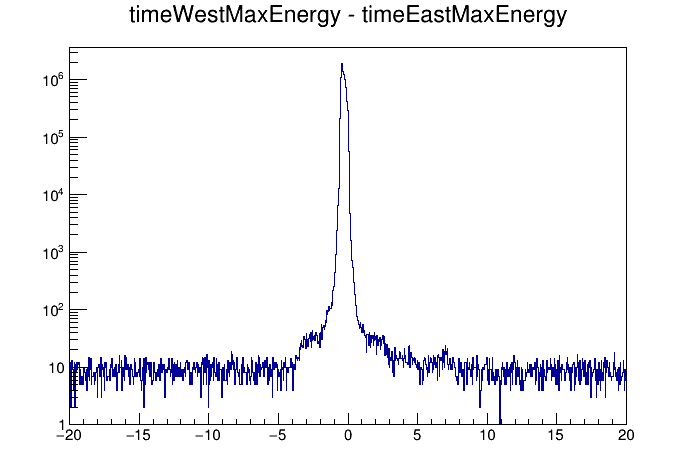

In [7]:
c = r.TCanvas()
t.Draw("timeWestMaxEnergy - timeEastMaxEnergy>>hist(1000,-20,20)")
c.SetLogy()
c.Draw()

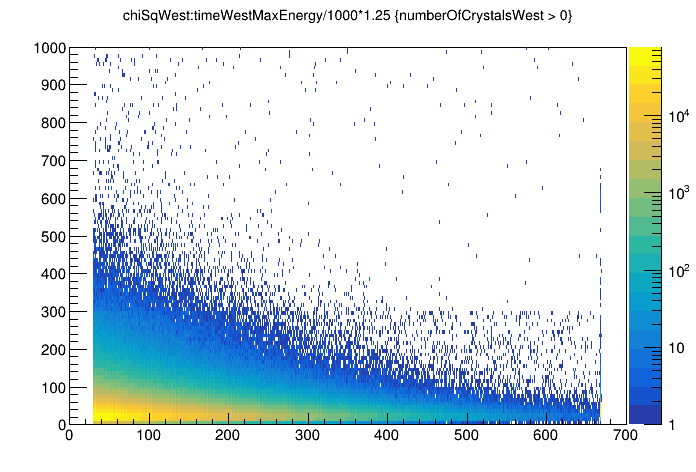

In [8]:
c = r.TCanvas()
t.Draw("chiSqWest:timeWestMaxEnergy/1000*1.25>>hist(700,0,700,100,0,1000)","numberOfCrystalsWest > 0","colz")
c.SetLogz()
c.Draw()

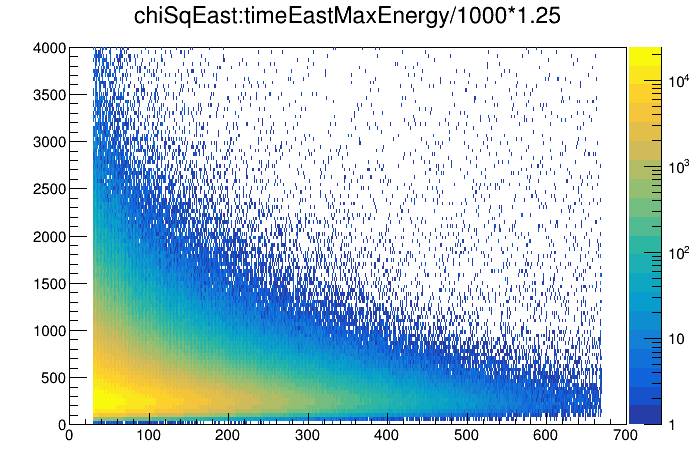

In [9]:
c = r.TCanvas()
t.Draw("chiSqEast:timeEastMaxEnergy/1000*1.25>>hist(700,0,700,100,0,4000)","","colz")
c.SetLogz()
c.Draw()

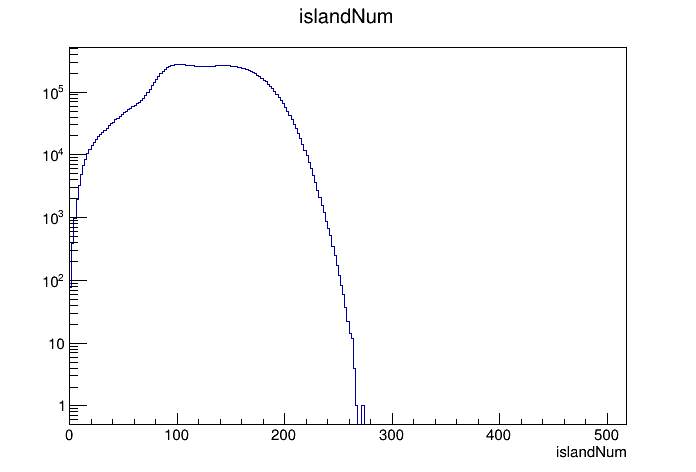

In [10]:
c = r.TCanvas()
t.Draw("islandNum","","colz")
c.SetLogy()
c.Draw()


****************************************
Minimizer is Linear
Chi2                      =  6.23288e+08
NDf                       =        41580
p0                        =     -5.08592   +/-   0.586859    
p1                        =      1.10882   +/-   0.000460179 


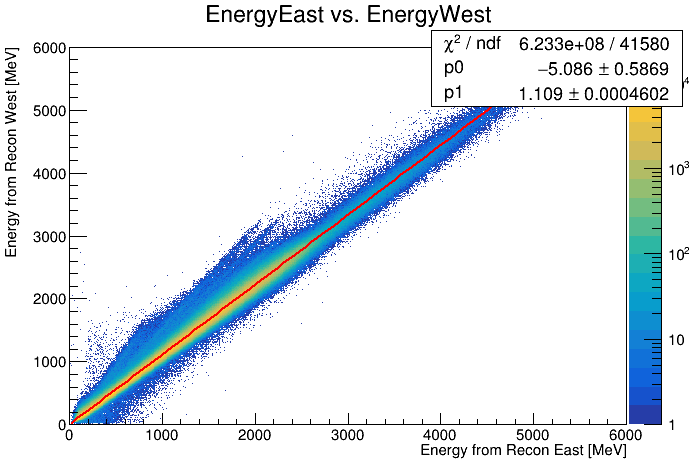

In [11]:
c = r.TCanvas()
evwEnergyEvW = f.Get("farline").Get("evwEnergyEvW").Clone()
evwEnergyEvW.Draw("colz")
evwEnergyEvW.Fit("pol1")
c.SetLogz()
c.Draw()

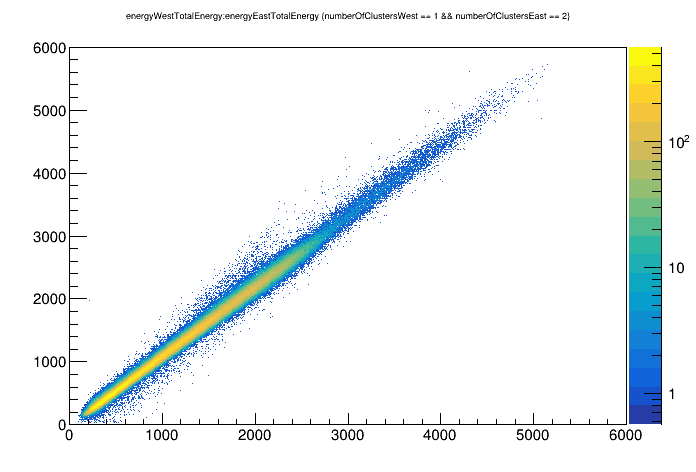

In [12]:
c = r.TCanvas()
t.Draw("energyWestTotalEnergy:energyEastTotalEnergy>>hist(600,0,6000,600,0,6000)","numberOfClustersWest == 1 && numberOfClustersEast == 2","colz")
c.SetLogz()
c.Draw()

---

## n:0 clusters

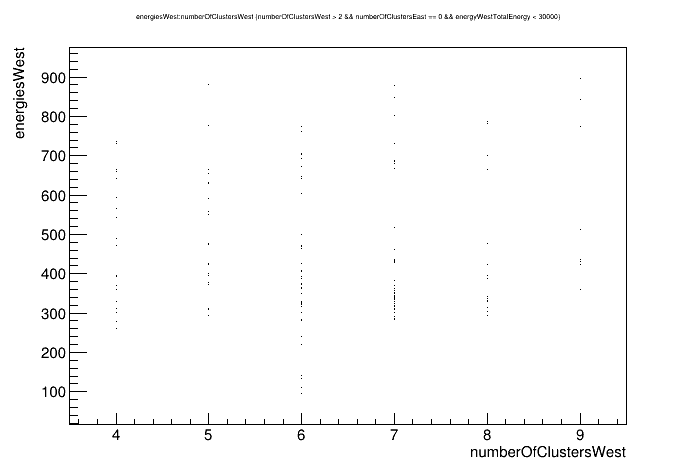

In [13]:
c = r.TCanvas()
t.Draw("energiesWest:numberOfClustersWest"
       ,"numberOfClustersWest > 2 && numberOfClustersEast == 0 && energyWestTotalEnergy < 30000"
       ,"")
c.SetLogz()
c.Draw()

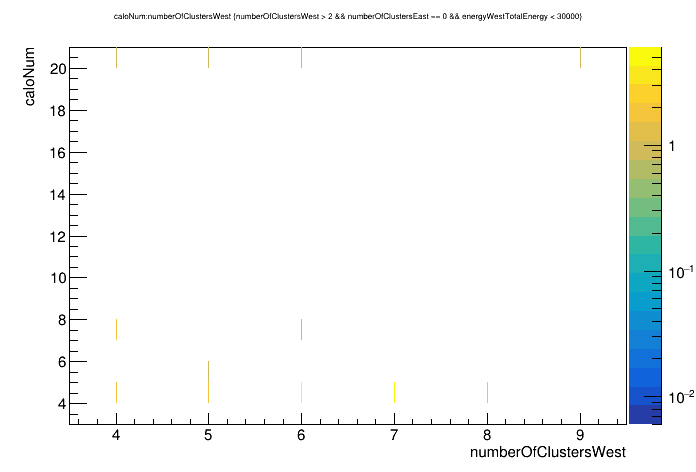

In [14]:
c = r.TCanvas()
t.Draw("caloNum:numberOfClustersWest"
       ,"numberOfClustersWest > 2 && numberOfClustersEast == 0 && energyWestTotalEnergy < 30000"
       ,"colz")
c.SetLogz()
c.Draw()

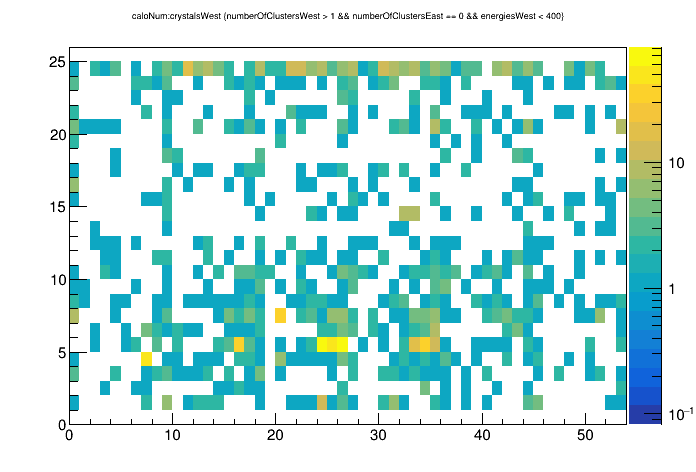

In [15]:
c = r.TCanvas()
t.Draw("caloNum:crystalsWest>>hist(54,0,54,26,0,26)",
       "numberOfClustersWest > 1 && numberOfClustersEast == 0 && energiesWest < 400",
       "colz")
c.SetLogz()
c.Draw()

25
15975.0 147.0
15957.0 213.0
15986.0 422.0
15942.0 161.0
15989.0 205.0
15929.0 278.0
15949.0 119.0
15984.0 93.0
15950.0 219.0
15946.0 388.0
15950.0 217.0
15932.0 31.0
15927.0 72.0
15984.0 79.0
15939.0 286.0
15972.0 297.0
15991.0 37.0
15991.0 37.0
15968.0 99.0
15922.0 309.0
15922.0 309.0
15922.0 309.0
15924.0 344.0
15927.0 16.0
15927.0 16.0


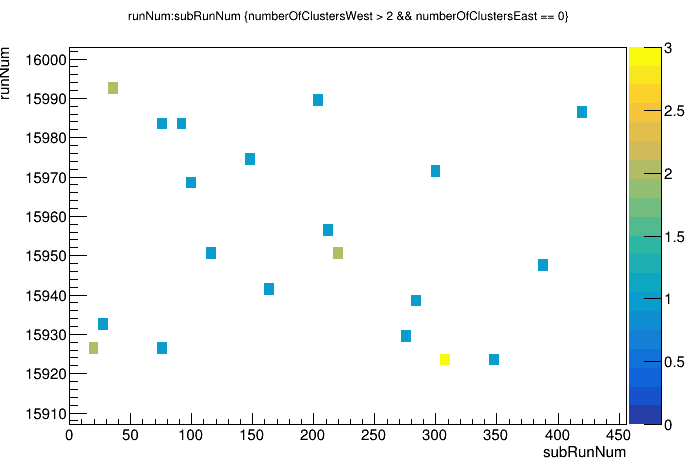

In [16]:
c = r.TCanvas()
num = t.Draw("runNum:subRunNum","numberOfClustersWest > 2 && numberOfClustersEast == 0","colz")
print(num)
for i in range(num):
    print((t.GetV1()[i]),(t.GetV2()[i]))
c.Draw()

---

### Now lets make look at the 1:2 clusters specifically

In [17]:
condition = " numberOfClustersWest == 2 && numberOfClustersEast == 1"

Number of free parameters from FitConfig = 1
Number of free parameters from Minimizer = 2

****************************************
Minimizer is Linear
Chi2                      =  6.38441e+06
NDf                       =         9211
p0                        =            0                      	 (fixed)
p1                        =      1.14389   +/-   0.00089536  


Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent


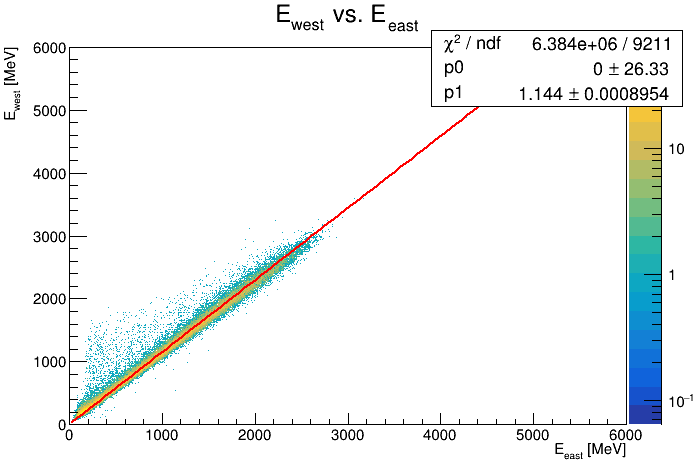

In [18]:
c = r.TCanvas()
h = r.TH2D("h","E_{west} vs. E_{east}; E_{east} [MeV]; E_{west} [MeV]",600,0,6000,600,0,6000)
t.Draw("energyWestTotalEnergy:energyEastTotalEnergy>>h", condition, "goff")
h.Draw("colz")
func = r.TF1("func","pol1")
func.FixParameter(0,0)
h.Fit("func")
c.SetLogz()
c.Draw()

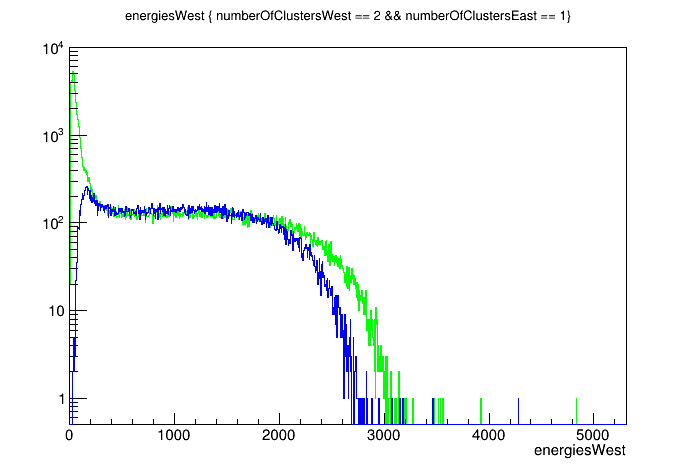

In [19]:
c = r.TCanvas()
t.SetLineColor(3)
t.Draw("energiesWest",condition, "")
t.SetLineColor(4)
t.Draw("energiesEast",condition, "same")
c.SetLogy()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


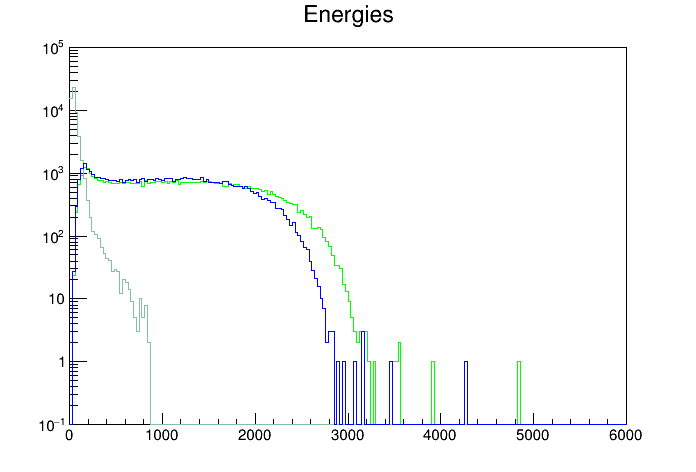

In [20]:
c = r.TCanvas()
h = r.TH1D("h","Energies", 200,0,6000)
h.SetLineColor(3)
t.Draw("Max$(energiesWest)>>h",condition)
t.SetLineColor(30)
t.Draw("Min$(energiesWest)",condition, "same")
t.SetLineColor(4)
t.Draw("energiesEast",condition, "same")
c.SetLogy()
h.GetYaxis().SetRangeUser(0.1,100000)
c.Draw()

---

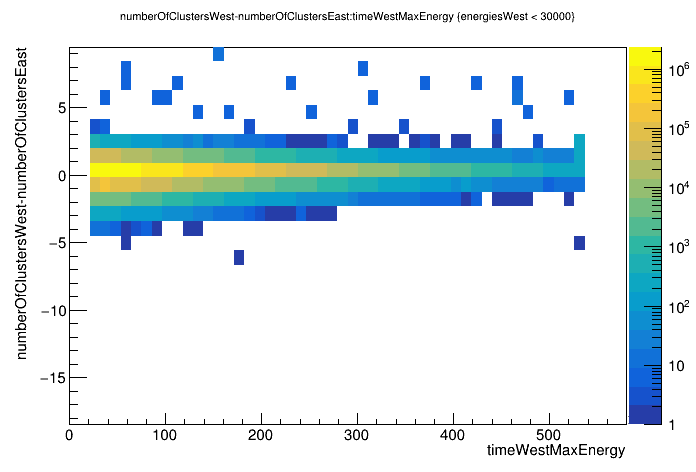

In [21]:
c = r.TCanvas()
t.Draw("numberOfClustersWest-numberOfClustersEast:timeWestMaxEnergy","energiesWest < 30000","colz")
c.SetLogz()
c.Draw()

368123
13556
524
19


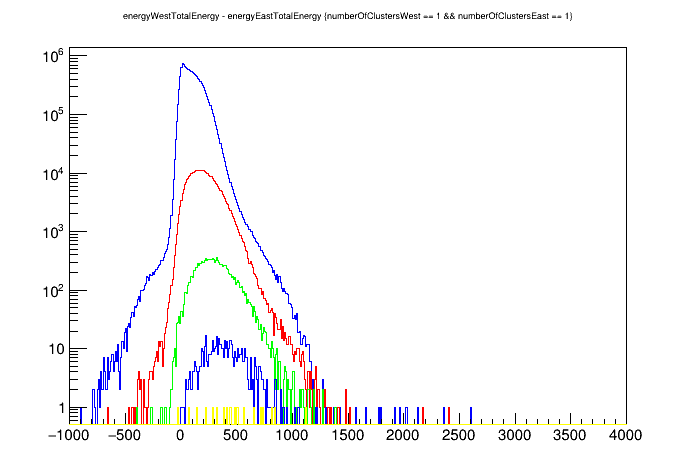

In [22]:
c = r.TCanvas()
t.Draw("energyWestTotalEnergy - energyEastTotalEnergy>>hist(500,-1000,4000)",
       "numberOfClustersWest == 1 && numberOfClustersEast == 1",
       "colz")
for i in range(2,6):
    t.SetLineColor(i)
    ding = t.Draw("energyWestTotalEnergy - energyEastTotalEnergy",
       "numberOfClustersWest == "+str(i)+" && numberOfClustersEast == "+str(i),
       "colz same")
    print(ding)
c.SetLogy()
c.Draw()

In [27]:
t.SetLineColor(4)

---

### Now lets look at $N_{west} = 0$ for which $N_{east} > 2$

In [46]:
condition = "numberOfClustersWest == 1 && numberOfClustersEast > 3"

1181 such clusters.


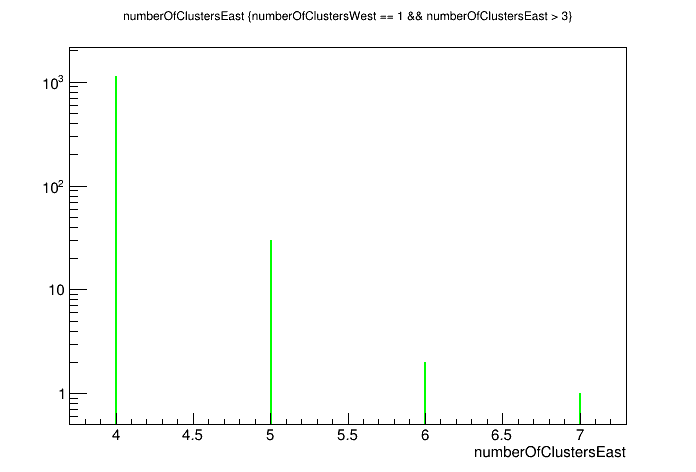

In [48]:
c = r.TCanvas()
num = t.Draw("numberOfClustersEast",condition,"")
print(num,"such clusters.")
c.SetLogy()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


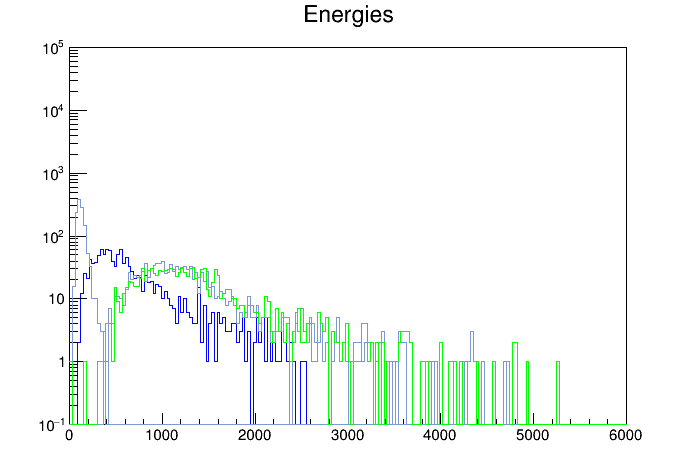

In [49]:
c = r.TCanvas()
h = r.TH1D("h","Energies", 200,0,6000)
h.SetLineColor(4)
t.Draw("Max$(energiesEast)>>h",condition)
t.SetLineColor(38)
t.Draw("Min$(energiesEast)",condition, "same")
t.Draw("energyEastTotalEnergy",condition, "same")
t.SetLineColor(3)
t.Draw("energiesWest",condition, "same")
c.SetLogy()
h.GetYaxis().SetRangeUser(0.1,100000)
c.Draw()

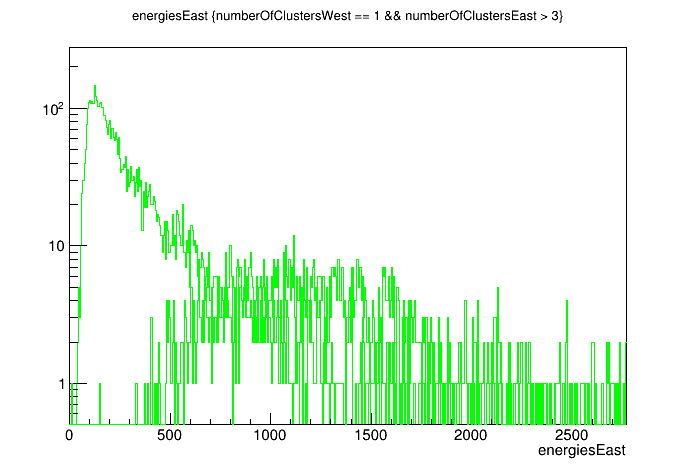

In [50]:
c = r.TCanvas()
t.Draw("energiesEast",condition,"")
t.Draw("energiesWest",condition,"same")
c.SetLogy()
c.Draw()

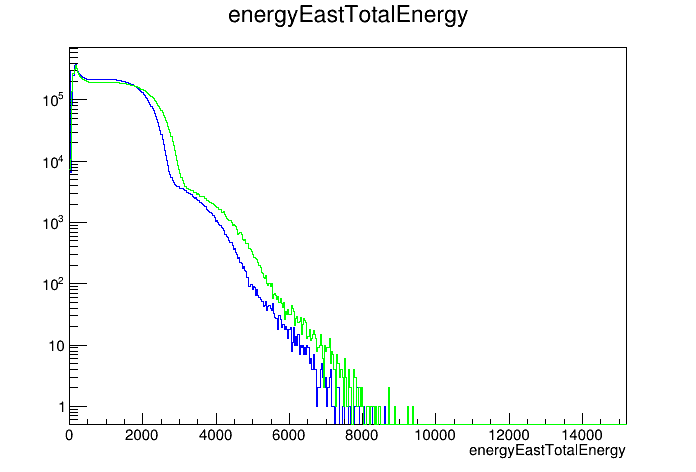

In [52]:
c = r.TCanvas()
t.SetLineColor(4)
t.Draw("energyEastTotalEnergy","","")
t.SetLineColor(3)
t.Draw("energyWestTotalEnergy","","same")
c.SetLogy()
c.Draw()

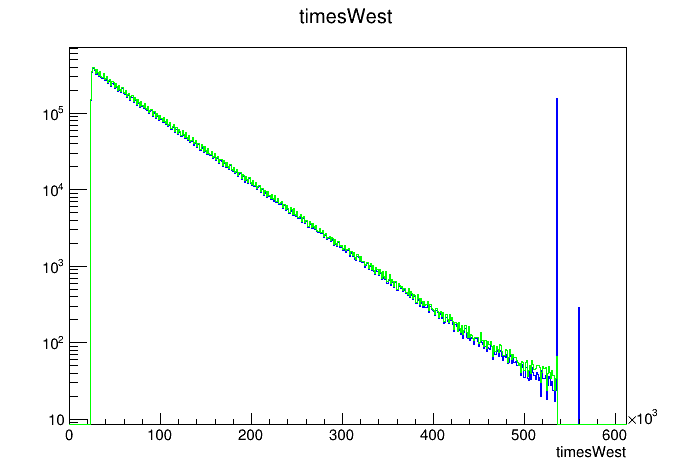

In [53]:
c = r.TCanvas()
t.SetLineColor(4)
t.Draw("timesWest","","")
t.SetLineColor(3)
t.Draw("timesEast","","same")
c.SetLogy()
c.Draw()